In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
df = pd.read_csv('clean-data/Whiskey_data/whisky-weather-data.csv')
df.columns

Index(['vintage', 'avp', 'size', 'price', 'name', 'precip', 'temp', 'max_t',
       'min_t'],
      dtype='object')

In [3]:
X = df[['vintage','avp','size','precip','temp','max_t','min_t']]
y = df['price']

In [4]:
y = y.values.reshape(-1, 1)

In [5]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [6]:
scaler_X.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
scaler_y.fit(y)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
Xscaled = scaler_X.transform(X)

In [9]:
yscaled = scaler_y.transform(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled, yscaled)

In [21]:
model = Sequential()
model.add(Dense(7, input_dim = 7, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [23]:
history = model.fit(X_train, y_train, epochs=300, batch_size=50,  verbose=1, validation_split=0.2)

Train on 3048 samples, validate on 762 samples
Epoch 1/300
3048/3048 [==============================] - 0s 51us/sample - loss: 7.0094e-04 - mean_squared_error: 7.0094e-04 - mean_absolute_error: 0.0082 - val_loss: 2.9156e-04 - val_mean_squared_error: 2.9156e-04 - val_mean_absolute_error: 0.0077
Epoch 2/300
3048/3048 [==============================] - 0s 17us/sample - loss: 7.0011e-04 - mean_squared_error: 7.0011e-04 - mean_absolute_error: 0.0083 - val_loss: 2.9796e-04 - val_mean_squared_error: 2.9796e-04 - val_mean_absolute_error: 0.0072
Epoch 3/300
3048/3048 [==============================] - 0s 17us/sample - loss: 6.9194e-04 - mean_squared_error: 6.9194e-04 - mean_absolute_error: 0.0080 - val_loss: 2.8777e-04 - val_mean_squared_error: 2.8777e-04 - val_mean_absolute_error: 0.0089
Epoch 4/300
3048/3048 [==============================] - 0s 16us/sample - loss: 6.9500e-04 - mean_squared_error: 6.9500e-04 - mean_absolute_error: 0.0081 - val_loss: 2.8624e-04 - val_mean_squared_error: 2.8624

Epoch 34/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8786e-04 - mean_squared_error: 6.8786e-04 - mean_absolute_error: 0.0080 - val_loss: 2.8125e-04 - val_mean_squared_error: 2.8125e-04 - val_mean_absolute_error: 0.0086
Epoch 35/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8464e-04 - mean_squared_error: 6.8464e-04 - mean_absolute_error: 0.0078 - val_loss: 2.9873e-04 - val_mean_squared_error: 2.9873e-04 - val_mean_absolute_error: 0.0076
Epoch 36/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8751e-04 - mean_squared_error: 6.8751e-04 - mean_absolute_error: 0.0078 - val_loss: 2.8258e-04 - val_mean_squared_error: 2.8258e-04 - val_mean_absolute_error: 0.0078
Epoch 37/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.9090e-04 - mean_squared_error: 6.9090e-04 - mean_absolute_error: 0.0078 - val_loss: 2.8464e-04 - val_mean_squared_error: 2.8464e-04 - val_mean_absolute_error: 0.0092
Epoc

Epoch 67/300
3048/3048 [==============================] - 0s 16us/sample - loss: 6.8658e-04 - mean_squared_error: 6.8658e-04 - mean_absolute_error: 0.0077 - val_loss: 2.8311e-04 - val_mean_squared_error: 2.8311e-04 - val_mean_absolute_error: 0.0078
Epoch 68/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8597e-04 - mean_squared_error: 6.8597e-04 - mean_absolute_error: 0.0079 - val_loss: 2.8928e-04 - val_mean_squared_error: 2.8928e-04 - val_mean_absolute_error: 0.0073
Epoch 69/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8509e-04 - mean_squared_error: 6.8509e-04 - mean_absolute_error: 0.0076 - val_loss: 2.9023e-04 - val_mean_squared_error: 2.9023e-04 - val_mean_absolute_error: 0.0101
Epoch 70/300
3048/3048 [==============================] - 0s 16us/sample - loss: 6.9254e-04 - mean_squared_error: 6.9254e-04 - mean_absolute_error: 0.0083 - val_loss: 2.8293e-04 - val_mean_squared_error: 2.8293e-04 - val_mean_absolute_error: 0.0078
Epoc

Epoch 100/300
3048/3048 [==============================] - 0s 16us/sample - loss: 6.8735e-04 - mean_squared_error: 6.8735e-04 - mean_absolute_error: 0.0077 - val_loss: 2.8746e-04 - val_mean_squared_error: 2.8746e-04 - val_mean_absolute_error: 0.0093
Epoch 101/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8490e-04 - mean_squared_error: 6.8490e-04 - mean_absolute_error: 0.0077 - val_loss: 2.8168e-04 - val_mean_squared_error: 2.8168e-04 - val_mean_absolute_error: 0.0076
Epoch 102/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8536e-04 - mean_squared_error: 6.8536e-04 - mean_absolute_error: 0.0080 - val_loss: 2.9087e-04 - val_mean_squared_error: 2.9087e-04 - val_mean_absolute_error: 0.0074
Epoch 103/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8733e-04 - mean_squared_error: 6.8733e-04 - mean_absolute_error: 0.0078 - val_loss: 2.8145e-04 - val_mean_squared_error: 2.8145e-04 - val_mean_absolute_error: 0.0075


Epoch 133/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8168e-04 - mean_squared_error: 6.8168e-04 - mean_absolute_error: 0.0077 - val_loss: 2.8303e-04 - val_mean_squared_error: 2.8303e-04 - val_mean_absolute_error: 0.0075
Epoch 134/300
3048/3048 [==============================] - 0s 16us/sample - loss: 6.8439e-04 - mean_squared_error: 6.8439e-04 - mean_absolute_error: 0.0079 - val_loss: 2.7988e-04 - val_mean_squared_error: 2.7988e-04 - val_mean_absolute_error: 0.0079
Epoch 135/300
3048/3048 [==============================] - 0s 16us/sample - loss: 6.8747e-04 - mean_squared_error: 6.8747e-04 - mean_absolute_error: 0.0080 - val_loss: 2.8810e-04 - val_mean_squared_error: 2.8810e-04 - val_mean_absolute_error: 0.0099
Epoch 136/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8534e-04 - mean_squared_error: 6.8534e-04 - mean_absolute_error: 0.0079 - val_loss: 2.8405e-04 - val_mean_squared_error: 2.8405e-04 - val_mean_absolute_error: 0.0073


Epoch 166/300
3048/3048 [==============================] - 0s 16us/sample - loss: 6.8091e-04 - mean_squared_error: 6.8091e-04 - mean_absolute_error: 0.0078 - val_loss: 2.8348e-04 - val_mean_squared_error: 2.8348e-04 - val_mean_absolute_error: 0.0075
Epoch 167/300
3048/3048 [==============================] - 0s 17us/sample - loss: 6.8171e-04 - mean_squared_error: 6.8171e-04 - mean_absolute_error: 0.0080 - val_loss: 2.8333e-04 - val_mean_squared_error: 2.8333e-04 - val_mean_absolute_error: 0.0075
Epoch 168/300
3048/3048 [==============================] - 0s 19us/sample - loss: 6.8151e-04 - mean_squared_error: 6.8151e-04 - mean_absolute_error: 0.0076 - val_loss: 2.8085e-04 - val_mean_squared_error: 2.8085e-04 - val_mean_absolute_error: 0.0093
Epoch 169/300
3048/3048 [==============================] - 0s 18us/sample - loss: 6.8488e-04 - mean_squared_error: 6.8488e-04 - mean_absolute_error: 0.0077 - val_loss: 2.8095e-04 - val_mean_squared_error: 2.8095e-04 - val_mean_absolute_error: 0.0085


Epoch 199/300
3048/3048 [==============================] - 0s 16us/sample - loss: 6.8134e-04 - mean_squared_error: 6.8134e-04 - mean_absolute_error: 0.0078 - val_loss: 2.8980e-04 - val_mean_squared_error: 2.8980e-04 - val_mean_absolute_error: 0.0073
Epoch 200/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8000e-04 - mean_squared_error: 6.8000e-04 - mean_absolute_error: 0.0077 - val_loss: 2.7889e-04 - val_mean_squared_error: 2.7889e-04 - val_mean_absolute_error: 0.0086
Epoch 201/300
3048/3048 [==============================] - 0s 16us/sample - loss: 6.7921e-04 - mean_squared_error: 6.7921e-04 - mean_absolute_error: 0.0078 - val_loss: 2.8198e-04 - val_mean_squared_error: 2.8198e-04 - val_mean_absolute_error: 0.0092
Epoch 202/300
3048/3048 [==============================] - 0s 16us/sample - loss: 6.8403e-04 - mean_squared_error: 6.8403e-04 - mean_absolute_error: 0.0078 - val_loss: 2.8414e-04 - val_mean_squared_error: 2.8414e-04 - val_mean_absolute_error: 0.0085


Epoch 232/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.7985e-04 - mean_squared_error: 6.7985e-04 - mean_absolute_error: 0.0079 - val_loss: 2.8305e-04 - val_mean_squared_error: 2.8305e-04 - val_mean_absolute_error: 0.0076
Epoch 233/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.7974e-04 - mean_squared_error: 6.7974e-04 - mean_absolute_error: 0.0078 - val_loss: 2.8376e-04 - val_mean_squared_error: 2.8376e-04 - val_mean_absolute_error: 0.0074
Epoch 234/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8211e-04 - mean_squared_error: 6.8211e-04 - mean_absolute_error: 0.0078 - val_loss: 2.8105e-04 - val_mean_squared_error: 2.8105e-04 - val_mean_absolute_error: 0.0078
Epoch 235/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8147e-04 - mean_squared_error: 6.8147e-04 - mean_absolute_error: 0.0080 - val_loss: 2.7835e-04 - val_mean_squared_error: 2.7835e-04 - val_mean_absolute_error: 0.0081


Epoch 265/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8037e-04 - mean_squared_error: 6.8037e-04 - mean_absolute_error: 0.0079 - val_loss: 2.7939e-04 - val_mean_squared_error: 2.7939e-04 - val_mean_absolute_error: 0.0083
Epoch 266/300
3048/3048 [==============================] - 0s 16us/sample - loss: 6.7942e-04 - mean_squared_error: 6.7942e-04 - mean_absolute_error: 0.0078 - val_loss: 2.8202e-04 - val_mean_squared_error: 2.8202e-04 - val_mean_absolute_error: 0.0074
Epoch 267/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8146e-04 - mean_squared_error: 6.8146e-04 - mean_absolute_error: 0.0079 - val_loss: 2.8422e-04 - val_mean_squared_error: 2.8422e-04 - val_mean_absolute_error: 0.0089
Epoch 268/300
3048/3048 [==============================] - 0s 16us/sample - loss: 6.8029e-04 - mean_squared_error: 6.8029e-04 - mean_absolute_error: 0.0079 - val_loss: 2.7952e-04 - val_mean_squared_error: 2.7952e-04 - val_mean_absolute_error: 0.0077


Epoch 298/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8033e-04 - mean_squared_error: 6.8033e-04 - mean_absolute_error: 0.0077 - val_loss: 2.7707e-04 - val_mean_squared_error: 2.7707e-04 - val_mean_absolute_error: 0.0082
Epoch 299/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.7692e-04 - mean_squared_error: 6.7692e-04 - mean_absolute_error: 0.0077 - val_loss: 2.7853e-04 - val_mean_squared_error: 2.7853e-04 - val_mean_absolute_error: 0.0086
Epoch 300/300
3048/3048 [==============================] - 0s 15us/sample - loss: 6.8100e-04 - mean_squared_error: 6.8100e-04 - mean_absolute_error: 0.0080 - val_loss: 2.8339e-04 - val_mean_squared_error: 2.8339e-04 - val_mean_absolute_error: 0.0093


dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


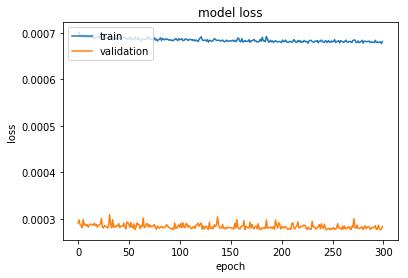

In [24]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
import seaborn as sns

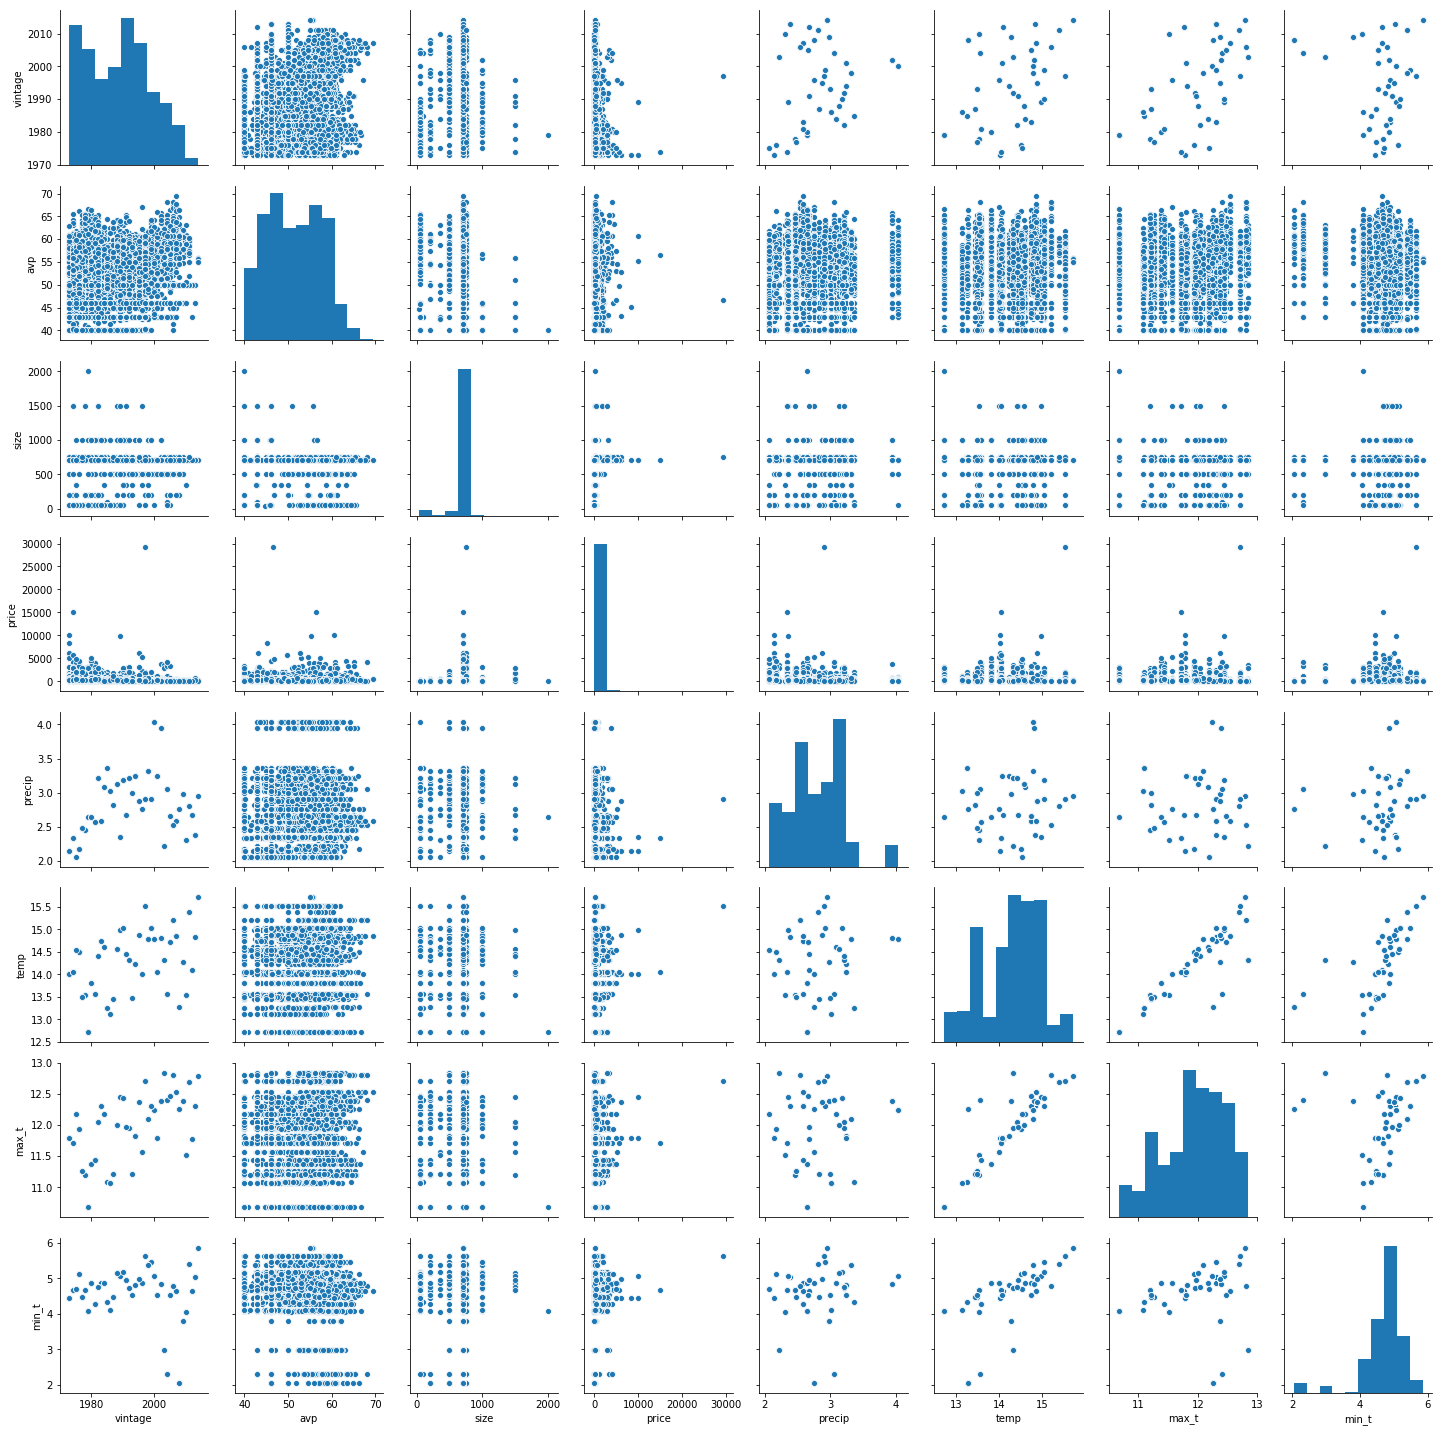

In [29]:
sns.pairplot(df)

In [30]:
df2 = pd.read_csv('clean-data/Whiskey_data/weather_whiskey Jul23.csv')

In [34]:
df2.dropna(subset = ['distilled'])

,Unnamed: 0,row,Maker,distilled,age in cast,ABV,Blended,Bourbon,Flavored,Other,...,world,review score,price,style,country,temperature,precipitation,Unnamed: 0.1,Temperature,Precipitation
1942,1942,2.0,Black Bowmore,1964.0,42 year old,40.50%,0.0,0.0,0.0,0.0,...,0.0,97.0,4500.0,Single Malt Scotch,UK,NaN,NaN,NaN,NaN,NaN
1943,1943,6.0,Gold Bowmore,1964.0,39 year old,42.40%,0.0,0.0,0.0,0.0,...,0.0,96.0,6250.0,Single Malt Scotch,UK,NaN,NaN,NaN,NaN,NaN
1944,1944,57.0,White Bowmore,1964.0,43 year old,42.80%,0.0,0.0,0.0,0.0,...,0.0,94.0,6000.0,Single Malt Scotch,UK,NaN,NaN,NaN,NaN,NaN
1945,1945,76.0,Highland Park,1964.0,NaN,42.20%,0.0,0.0,0.0,0.0,...,0.0,94.0,6088.0,Single Malt Scotch,UK,NaN,NaN,NaN,NaN,NaN
1946,1946,135.0,The Glenlivet,1964.0,NaN,44.70%,0.0,0.0,0.0,0.0,...,0.0,93.0,2000.0,Single Malt Scotch,UK,NaN,NaN,NaN,NaN,NaN
1947,1947,221.0,Bowmore,1964.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,92.0,1500.0,Single Malt Scotch,UK,NaN,NaN,NaN,NaN,NaN
1948,1948,604.0,Scott's Selection,1964.0,NaN,45.50%,0.0,0.0,0.0,0.0,...,0.0,90.0,140.0,Grain Scotch Whisky,UK,NaN,NaN,NaN,NaN,NaN
1949,1949,714.0,Bowmore,1964.0,NaN,49.40%,0.0,0.0,0.0,0.0,...,0.0,89.0,1500.0,Single Malt Scotch,UK,NaN,NaN,NaN,NaN,NaN
1950,1950,1661.0,Bowmore,1964.0,NaN,43.00%,0.0,0.0,0.0,0.0,...,0.0,85.0,1500.0,Single Malt Scotch,UK,NaN,NaN,NaN,NaN,NaN
1951,1951,9.0,Glenfarclas,1954.0,NaN,47.20%,0.0,0.0,0.0,0.0,...,0.0,96.0,3360.0,Single Malt Scotch,UK,NaN,NaN,NaN,NaN,NaN


In [33]:
df2

,Unnamed: 0,row,Maker,distilled,age in cast,ABV,Blended,Bourbon,Flavored,Other,...,world,review score,price,style,country,temperature,precipitation,Unnamed: 0.1,Temperature,Precipitation
0,0,1.0,Johnnie Walker,NaN,NaN,40.00%,1.0,0.0,0.0,0.0,...,0.0,97.0,225.0,Blended Scotch Whisky,UK,NaN,NaN,NaN,NaN,NaN
1,1,3.0,Bowmore,NaN,46 year old,42.90%,0.0,0.0,0.0,0.0,...,0.0,97.0,13500.0,Single Malt Scotch,UK,NaN,NaN,NaN,NaN,NaN
2,2,4.0,Compass Box,NaN,30 years old,53.40%,1.0,0.0,0.0,0.0,...,0.0,96.0,325.0,Blended Malt Scotch Whisky,UK,NaN,NaN,NaN,NaN,NaN
3,3,5.0,Chivas,NaN,NaN,40.00%,1.0,0.0,0.0,0.0,...,0.0,96.0,160.0,Blended Malt Scotch Whisky,UK,NaN,NaN,NaN,NaN,NaN
4,4,7.0,Bowmore,NaN,44 year old,44.80%,0.0,0.0,0.0,0.0,...,0.0,96.0,11000.0,Single Malt Scotch,UK,NaN,NaN,NaN,NaN,NaN
5,5,8.0,The Dalmore,NaN,50 year old,52.80%,0.0,0.0,0.0,0.0,...,0.0,96.0,1500.0,Single Malt Scotch,UK,NaN,NaN,NaN,NaN,NaN
6,6,12.0,The Last Drop,NaN,NaN,44.00%,0.0,0.0,0.0,0.0,...,0.0,96.0,3108.0,Grain Scotch Whisky,UK,NaN,NaN,NaN,NaN,NaN
7,7,13.0,Compass Box,NaN,NaN,48.90%,1.0,0.0,0.0,0.0,...,0.0,95.0,105.0,Blended Malt Scotch Whisky,UK,NaN,NaN,NaN,NaN,NaN
8,8,14.0,Compass Box,NaN,NaN,54.70%,1.0,0.0,0.0,0.0,...,0.0,95.0,120.0,Blended Scotch Whisky,UK,NaN,NaN,NaN,NaN,NaN
9,9,15.0,Johnnie Walker,NaN,NaN,60.00%,1.0,0.0,0.0,0.0,...,0.0,95.0,3500.0,Blended Scotch Whisky,UK,NaN,NaN,NaN,NaN,NaN


In [65]:
df3 = pd.read_csv('clean-data/Whiskey_data/whisky_advocate_weather.csv')
df3 = df3.loc[df3['price'] <= 655]

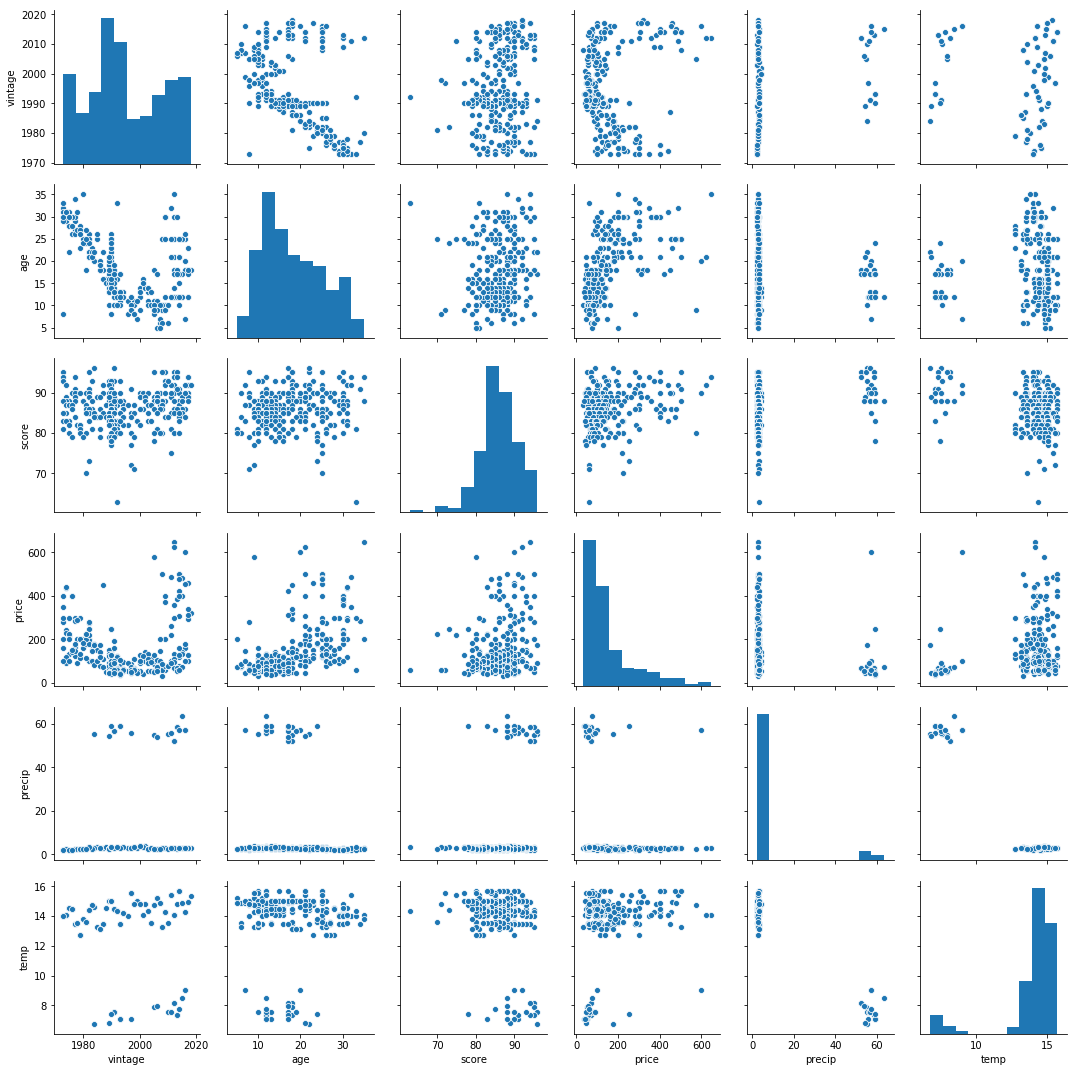

In [66]:
sns.pairplot(df3)

In [39]:
df3.dtypes

vintage      int64
age        float64
ABV         object
score        int64
price        int64
country     object
style       object
precip     float64
temp       float64
dtype: object

In [60]:
X = df3[['vintage', 'age','score','price','precip','temp']]
X = X.loc[X['price'] <= 655]

In [61]:
scaler = MinMaxScaler().fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [62]:
X_scaled = scaler.transform(X)

In [63]:
df4 = pd.DataFrame(X_scaled, columns = ['vintage', 'age','score','price','precip','temp'])

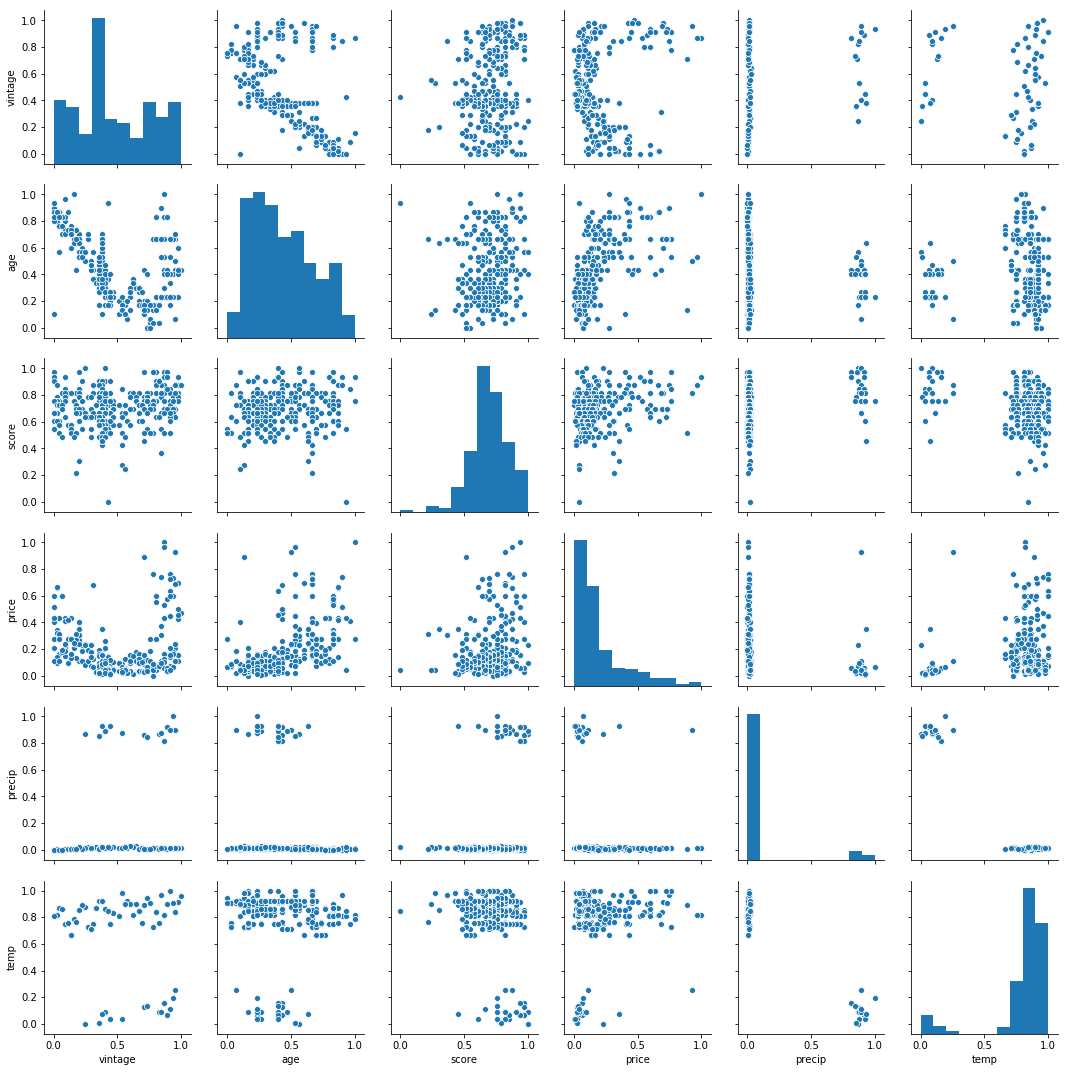

In [64]:
sns.pairplot(df4)

In [54]:
df3.sort_values(by = 'price', ascending = False)

,vintage,age,ABV,score,price,country,style,precip,temp
162,1980,31.0,52.10%,85,6400,UK,Single Malt Scotch,2.650912,13.813052
78,2015,32.0,53.90%,89,3700,UK,Single Malt Scotch,2.994260,14.880466
70,1990,20.0,57.90%,89,3600,UK,Single Malt Scotch,3.187438,15.033879
21,2017,37.0,51.00%,93,3500,UK,Single Malt Scotch,2.902850,14.959844
20,2014,35.0,56.50%,93,3300,UK,Single Malt Scotch,2.945972,15.711533
22,2015,34.0,50.90%,93,2000,UK,Single Malt Scotch,2.994260,14.880466
14,2015,37.0,50.40%,93,1925,UK,Single Malt Scotch,2.994260,14.880466
15,2017,34.0,51.90%,93,1700,UK,Single Malt Scotch,2.902850,14.959844
0,1976,29.0,45.40%,96,1500,UK,Single Malt Scotch,2.173272,14.501038
101,2017,32.0,48.20%,88,1400,UK,Single Malt Scotch,2.902850,14.959844
